# DS EDA Project
by Christian Reimann

## Prerequisites

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium
import json

# Pandas shouldn't truncate any columns
pd.options.display.max_columns = None

# Default seaborn style
sns.set_style("white")

# Constants
SPACE_NEEDLE_COORDS = [47.620422, -122.349358]
MAP_WIDTH = 800
MAP_HEIGHT = 600

FEATURE_COLS_NUMERIC = [
    "price",
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "sqft_lot",
    #"sqft_above",
    #"sqft_basement",
    "sqft_living15",
    "sqft_lot15",
]

FEATURE_COLS_CATEGORICAL = [
    "waterfront",
    "floors",
    "view",
    "condition",
    "grade"
]

## Exploring the data

In [90]:
# Load the data from previously downloaded csv file
df = pd.read_csv("data/eda.csv")
df.head(15)

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,1180.0,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0
1,2014-12-09,538000.0,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,2170.0,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0
2,2015-02-25,180000.0,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,770.0,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0
3,2014-12-09,604000.0,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,1050.0,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0
4,2015-02-18,510000.0,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,1680.0,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0
5,2014-05-12,1230000.0,7237550310,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,3,11,3890.0,1530.0,2001,0.0,98053,47.6561,-122.005,4760.0,101930.0
6,2014-06-27,257500.0,1321400060,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,3,7,1715.0,NaN,1995,0.0,98003,47.3097,-122.327,2238.0,6819.0
7,2015-01-15,291850.0,2008000270,3.0,1.50,1060.0,9711.0,1.0,0.0,NaN,3,7,1060.0,0.0,1963,0.0,98198,47.4095,-122.315,1650.0,9711.0
8,2015-04-15,229500.0,2414600126,3.0,1.00,1780.0,7470.0,1.0,0.0,0.0,3,7,1050.0,730.0,1960,0.0,98146,47.5123,-122.337,1780.0,8113.0
9,2015-03-12,323000.0,3793500160,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,3,7,1890.0,0.0,2003,0.0,98038,47.3684,-122.031,2390.0,7570.0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   bedrooms       21597 non-null  float64
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  float64
 6   sqft_lot       21597 non-null  float64
 7   floors         21597 non-null  float64
 8   waterfront     19206 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  float64
 13  sqft_basement  21145 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17749 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

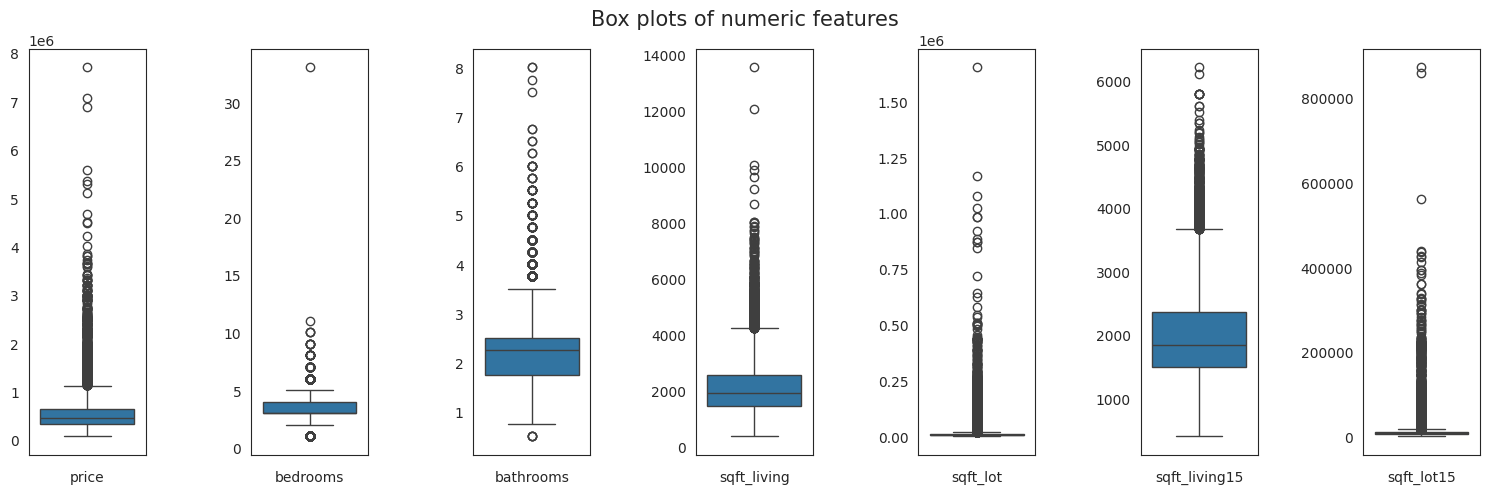

In [92]:
fig, ax = plt.subplots(1, len(FEATURE_COLS_NUMERIC), figsize = (15,5))

# Print box plots for every numeric feature
fig.suptitle("Box plots of numeric features", fontsize=15)

for i,col in enumerate(FEATURE_COLS_NUMERIC):
    f = sns.boxplot(df[col], ax=ax[i])
    f.set_xlabel(col)
    f.set_ylabel(None)

fig.tight_layout()
plt.subplots_adjust(wspace = 0.9, top = 0.9)
plt.show()

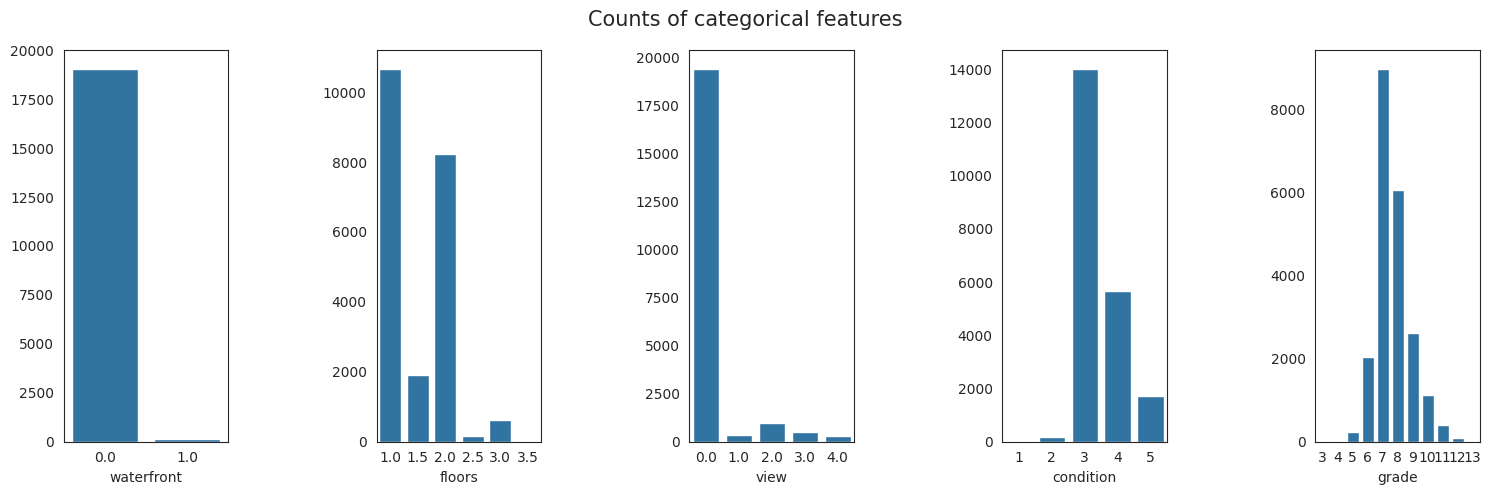

In [93]:
fig, ax = plt.subplots(1, len(FEATURE_COLS_CATEGORICAL), figsize = (15,5))

# Print histogram for every categorical feature
fig.suptitle("Counts of categorical features", fontsize=15)

for i,col in enumerate(FEATURE_COLS_CATEGORICAL):
    f = sns.countplot(df, x=col, ax=ax[i])
    f.set_xlabel(col)
    f.set_ylabel(None)

fig.tight_layout()
plt.subplots_adjust(wspace = 0.9, top = 0.9)
plt.show()

## Hypothesis

1. Locations at the waterfront are more expensive than those on the landside.

2. Houses closer to the city center are more expensive than those farer away.

3. Houses closer to the city center have less lot space.

## Data Cleaning

### Converting data types and adding derived columns

Lets have a look at the values in the *yr_renovated* and *yr_built* columns.

In [94]:
df["yr_built"].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

This one seems ok, but..

In [95]:
df["yr_renovated"].unique()

array([    0., 19910.,    nan, 20020., 20100., 19920., 20130., 19940.,
       19780., 20050., 20030., 19840., 19540., 20140., 20110., 19830.,
       19450., 19900., 19880., 19770., 19810., 19950., 20000., 19990.,
       19980., 19700., 19890., 20040., 19860., 20070., 19870., 20060.,
       19850., 20010., 19800., 19710., 19790., 19970., 19500., 19690.,
       19480., 20090., 20150., 19740., 20080., 19680., 20120., 19630.,
       19510., 19620., 19530., 19930., 19960., 19550., 19820., 19560.,
       19400., 19760., 19460., 19750., 19640., 19730., 19570., 19590.,
       19600., 19670., 19650., 19340., 19720., 19440., 19580.])

*yr_renovated* has wrong scale and type. Let's fix this.

In [96]:
df["yr_renovated"] = (df["yr_renovated"] / 10).astype("Int64")

The date column is of type object, so lets try to convert it to pandas data time and derive some more date columns from it.

In [97]:
# Convert to pandas datetime
df["sold_date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")

# Add derived columns
df["sold_year"] = df["sold_date"].dt.year
df["sold_month"] = df["sold_date"].dt.month
df["sold_weekday"] = df["sold_date"].dt.dayofweek
df["age"] = (df["sold_year"] - df["yr_built"])

# Drop old date column
df.drop("date", axis=1, inplace=True)

df[["sold_date", "sold_year", "sold_month", "sold_weekday", "age"]].head(10)

,sold_date,sold_year,sold_month,sold_weekday,age
0,2014-10-13,2014,10,0,59
1,2014-12-09,2014,12,1,63
2,2015-02-25,2015,2,2,82
3,2014-12-09,2014,12,1,49
4,2015-02-18,2015,2,2,28
5,2014-05-12,2014,5,0,13
6,2014-06-27,2014,6,4,19
7,2015-01-15,2015,1,3,52
8,2015-04-15,2015,4,2,55
9,2015-03-12,2015,3,3,12


We also like to have columns setting the house price in relation to the living- and lot spaces.

In [98]:
# The price divided by living space
df["price_per_sqft_living"] = df["price"] / df["sqft_living"]
# The price divided by lot space
df["price_per_sqft_lot"] = df["price"] / df["sqft_lot"]

df[["price", "sqft_living", "sqft_lot", "price_per_sqft_living", "price_per_sqft_lot"]].head(10)

,price,sqft_living,sqft_lot,price_per_sqft_living,price_per_sqft_lot
0,221900.0,1180.0,5650.0,188.050847,39.274336
1,538000.0,2570.0,7242.0,209.338521,74.288870
2,180000.0,770.0,10000.0,233.766234,18.000000
3,604000.0,1960.0,5000.0,308.163265,120.800000
4,510000.0,1680.0,8080.0,303.571429,63.118812
5,1230000.0,5420.0,101930.0,226.937269,12.067105
6,257500.0,1715.0,6819.0,150.145773,37.762135
7,291850.0,1060.0,9711.0,275.330189,30.053548
8,229500.0,1780.0,7470.0,128.932584,30.722892
9,323000.0,1890.0,6560.0,170.899471,49.237805


Since we have the (lat,long) coordinates of the houses, we can derive the distance to the city center from it. As an orientation point i chose the Seattle Space Needle sight, which is located in Uptown at `(47.620422, -122.349358)`. In further geo maps it is labeled with a black marker. We use the Haversine formula to calculate the distance:

In [99]:
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Radius of Earth in kilometers
    r = 6371
    
    # Calculate the result
    return c * r

# Apply the haversine function to each house in the dataset
df["distance"] = df.apply(
    lambda row: haversine(row["lat"], row["long"], SPACE_NEEDLE_COORDS[0], SPACE_NEEDLE_COORDS[1]), 
    axis=1
)

df[["lat", "long", "distance"]].head(10)

,lat,long,distance
0,47.5112,-122.257,13.982717
1,47.7210,-122.319,11.412436
2,47.7379,-122.233,15.701137
3,47.5208,-122.393,11.551176
4,47.6168,-122.045,22.815881
5,47.6561,-122.005,26.103934
6,47.3097,-122.327,34.591564
7,47.4095,-122.315,23.594970
8,47.5123,-122.337,12.058317
9,47.3684,-122.031,36.842916


For a better reading experience we sort all columns alphabetically:

In [100]:
df = df[sorted(df.columns)]

### Scouting for missing or duplicate values

<Axes: >

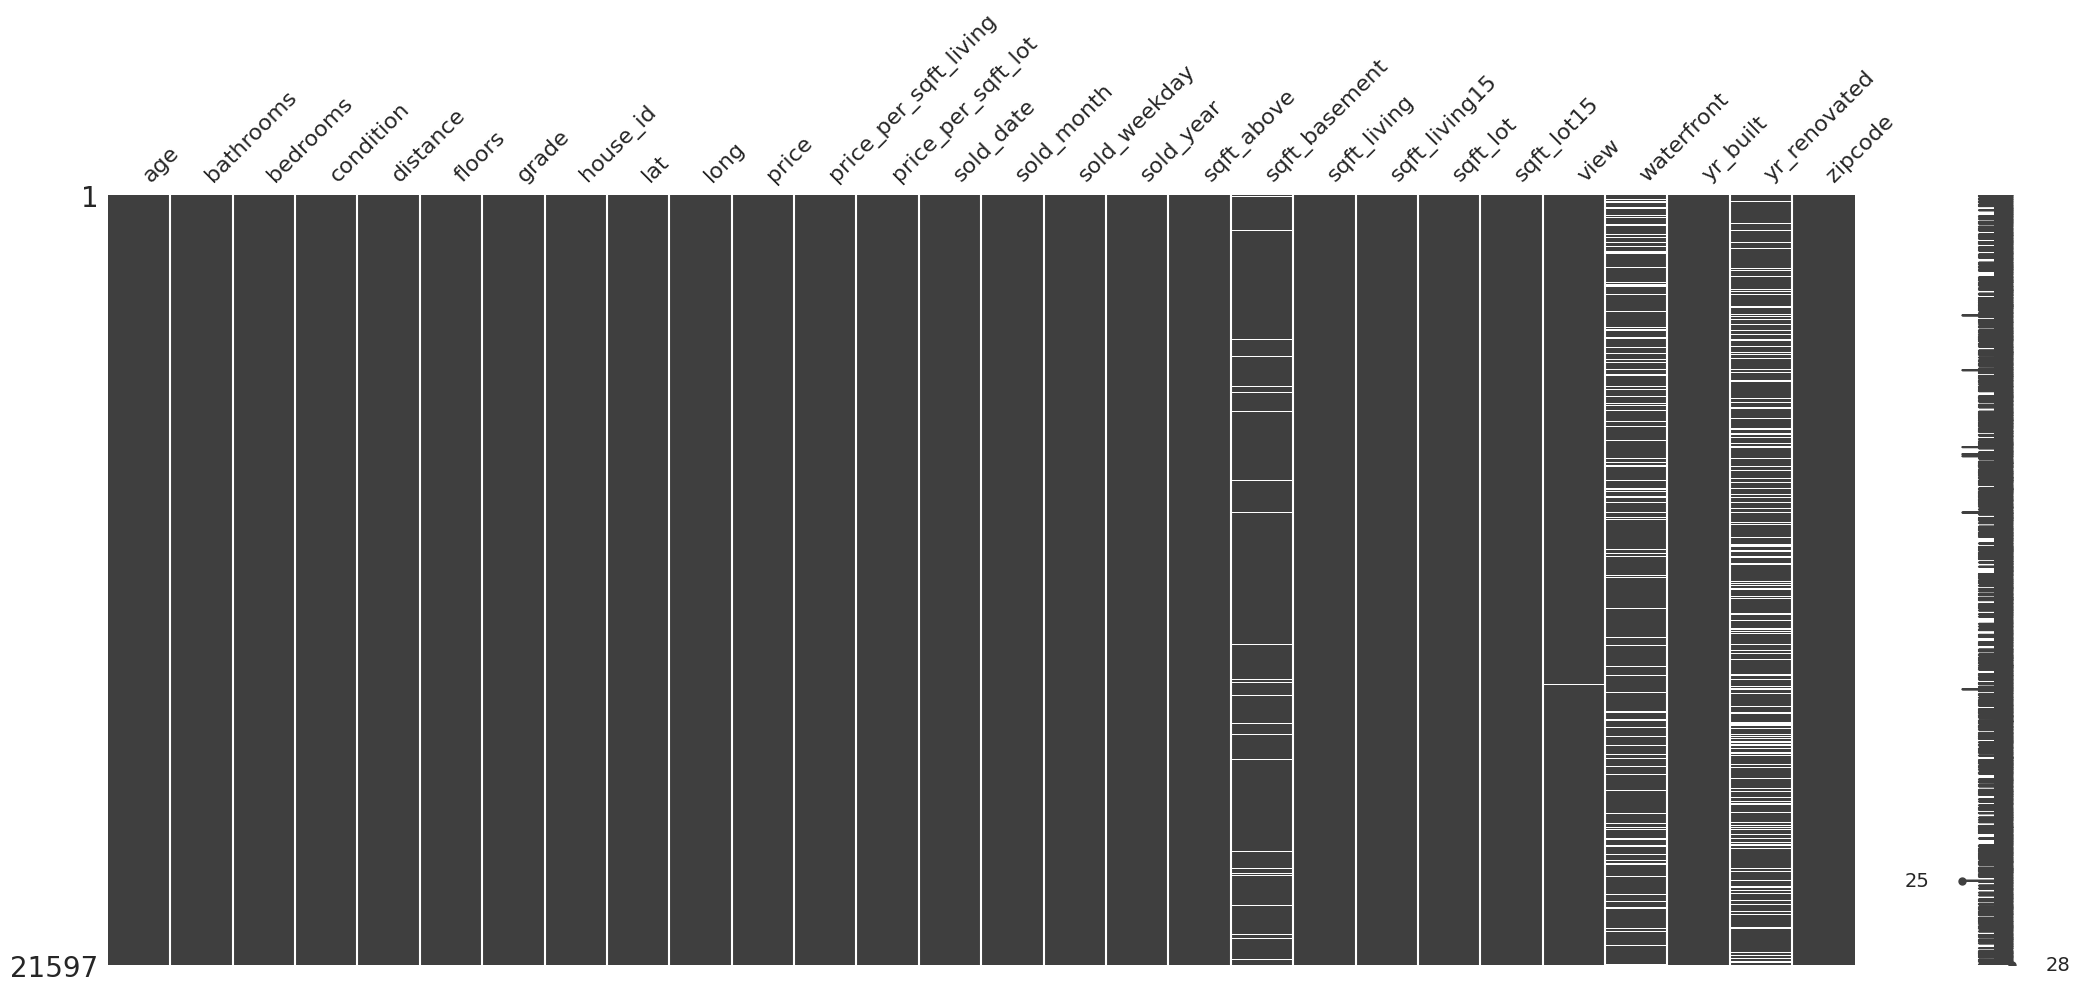

In [101]:
msno.matrix(df)
#print(df["waterfront"].isnull().sum()/df.shape[0])
#print(df["yr_renovated"].isnull().sum()/df.shape[0])
#print(df["waterfront"].value_counts())

There are some missing values in the waterfront, yt_renovated and sqft_basement columns. We might be able to imput the missing data, but it is not feasable in a short period of time.

In [102]:
df.duplicated().value_counts()

False    21597
Name: count, dtype: int64

Luckily we din't find any duplicate rows.

## Relationships

Let's have a look at the correlation matrix:

<Axes: >

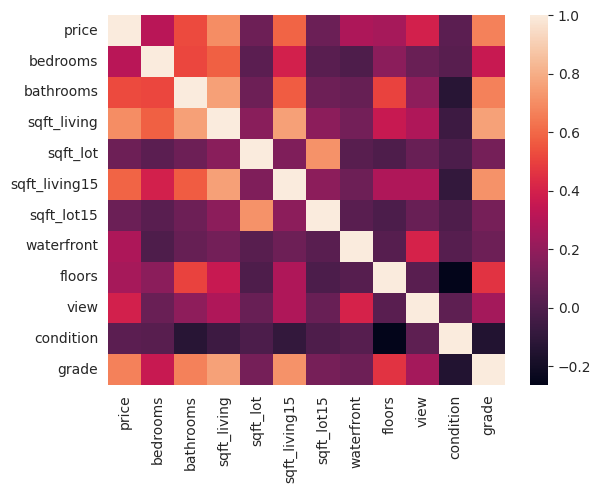

In [103]:
correlation_matrix = df[FEATURE_COLS_NUMERIC + FEATURE_COLS_CATEGORICAL].corr()
sns.heatmap(correlation_matrix)

In [104]:
# Make series from corr. matrix
s = correlation_matrix.abs().unstack()
# Filter self-correlated pairs and sort
s.where(s < 1).sort_values(ascending=False).head(20)

grade          sqft_living      0.762779
sqft_living    grade            0.762779
               sqft_living15    0.756402
sqft_living15  sqft_living      0.756402
bathrooms      sqft_living      0.755758
sqft_living    bathrooms        0.755758
sqft_lot15     sqft_lot         0.718204
sqft_lot       sqft_lot15       0.718204
sqft_living15  grade            0.713867
grade          sqft_living15    0.713867
sqft_living    price            0.701917
price          sqft_living      0.701917
grade          price            0.667951
price          grade            0.667951
grade          bathrooms        0.665838
bathrooms      grade            0.665838
price          sqft_living15    0.585241
sqft_living15  price            0.585241
sqft_living    bedrooms         0.578212
bedrooms       sqft_living      0.578212
dtype: float64

The correlation matrix reveals several relations. Some of seem trivial, for example the tuple `(price, sqft_living, 0.701917)`. It shows that for more living space, we also have to pay more. `(grade, sqft_living, 0.762779)` says the grade of a house grows with its living space. Other interesting relations are `(sqft_living, sqft_living15, 0.756402)` and `(sqft_lot, sqft_lot15, 0.718204)`. They show that the sizes of house and lot correlate with the ones in the nearby-neighborhood.


## Basic considerations

Now, let's have a look at the client. I chose Larry Sanders, who is looking for a house for himself and his **kids**. It must reside on the **waterfront**, in a **nice** and **isolated** but also **central** neighborhood **without kids**. Larry has a **limited budget**.

- Since larry has kids, we can assume that his house at least needs three bedrooms, one for himself and at least two for the kids. Further constraints could be a minimum living space.

- Only houses on the waterfront are being considered. Houses explicitly not on the waterfront or without any knowledge of it will be discarded

- The new home has to be central, so this will limit us either to a certain set of zipcodes or to a maximum search radius from the city center.

- Since larry has a limited budget, it is reasonable to find criteria, which have influence on the price. This could be the size of the house and lot, the renovation status, the neighborhood, the grade of the house or the time to buy.

- Larry wants a nice neighborhood. So how do define this? Interesting features/relations might be the AVG(grade) or the AVG(price) in an area.

- He also wants an isolated area and without kids, so we need a an area which is not family friendly. We might derive this from features like the number of bedroom, sqft_living, sqft_lot, sqft_living15 or sqft_lot15.

## Review of the assumptions

### Locations at the waterfront are more expensive than those on the landside

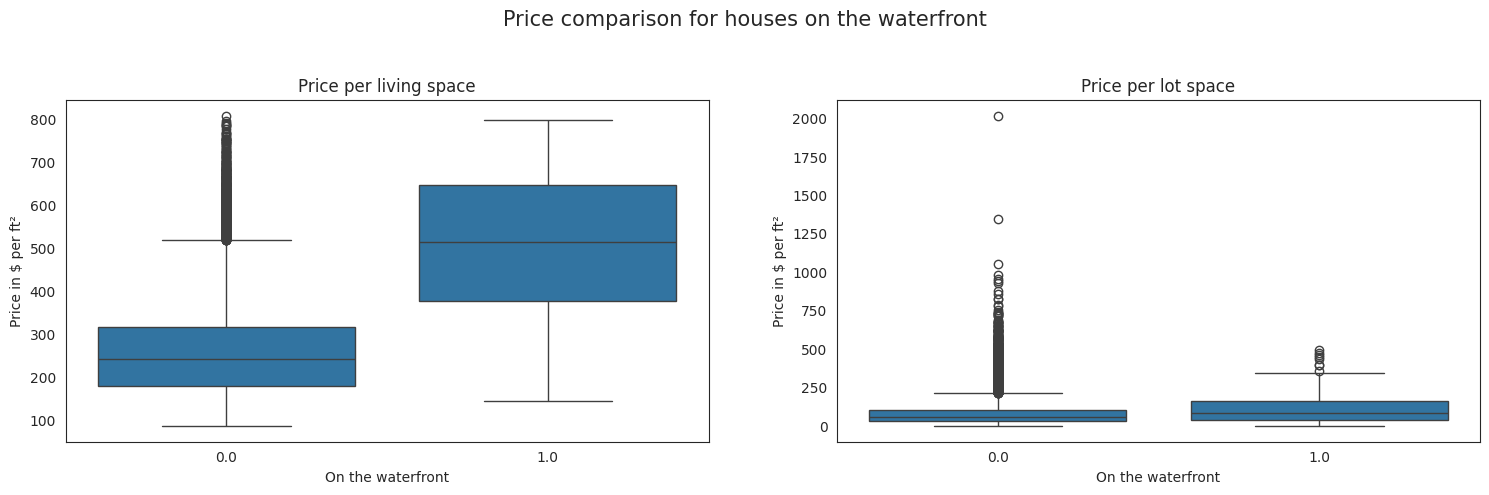

In [105]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
fig.suptitle("Price comparison for houses on the waterfront", fontsize=15)

f1 = sns.boxplot(x = df["waterfront"], y = df["price_per_sqft_living"], ax=ax[0])
f1.set(
    xlabel="On the waterfront",
    ylabel="Price in $ per ft²",
    title="Price per living space"
)

f2 = sns.boxplot(x = df["waterfront"], y = df["price_per_sqft_lot"], ax=ax[1])
f2.set(
    xlabel="On the waterfront",
    ylabel="Price in $ per ft²",
    title="Price per lot space"
)

fig.tight_layout()
plt.subplots_adjust(wspace = .2, top = 0.8)
plt.show()

The price comparison shows that there is little difference in prices when considering the size of the living space and lot combined. But if we just consider the living space, there is a significant difference in the mean price of about **250 USD/ft²** between houses lying on the waterfront and those which don't. This comparison anyway is a little bit fuzzy, because there are about 19000 houses without and only 146 ones with waterfront in the dataset.

### Houses closer to the city center are more expensive than those farer away

To gather this knowledge, we make use of a geographical plot. First, we build the median price of all houses in a certain area - in this case the zipcode is being used for that purpose. We then determine the Q25 and Q75 quantiles. Regions where the median house price is below Q25 are marked green, prices smaller than Q75 are orange and everything higher is marked red.

In [106]:
def map_price_to_color(price):
    if price < q25:
        return "green"
    if price < q75:
        return "orange"
    return "red"

# Get the q25 and q75 quantiles
q25 = df["price_per_sqft_living"].quantile(0.25)
q75 = df["price_per_sqft_living"].quantile(0.75)

# Aggregate data over zipcodes
map_df = df.groupby("zipcode").agg(
    lat=("lat", "mean"), 
    long=("long", "mean"), 
    price=("price_per_sqft_living", "median"),
    count=("house_id", "count")
)
map_df["zipcode"] = map_df.index

# Create the map
m = folium.Map(
    location = SPACE_NEEDLE_COORDS, 
    zoom_start = 10,
    scrollWheelZoom = False
)

# Wrap the map with a figure
f = folium.Figure(width=MAP_WIDTH, height=MAP_HEIGHT).add_child(m)

# Mark seattle space needle as city center
folium.Marker(
    location=SPACE_NEEDLE_COORDS, 
    icon=folium.Icon(prefix="fa", icon="house", color="black"),
    tooltip="Seattle Space Needle"
).add_to(m)

# Create a marker for every zipcode
for index, row in map_df.iterrows():
    folium.Marker(
        location=[row["lat"], row["long"]], 
        icon=folium.Icon(
            prefix="fa", icon="fa-house", color=map_price_to_color(row["price"])
        ), 
        tooltip=f"{int(row['count'])} object(s)<br/>" +
                f"Zipcode: {index}<br/>"
                f"Price: <b>{round(row['price'])}</b> $ / ft²"
    ).add_to(m)



    
# Plot the map
f

From the map markers we can infer, that houses closer to the city center are way more expensive than the ones in the greater area. One can also see this correlation when plotting the distance against the price per ft²:

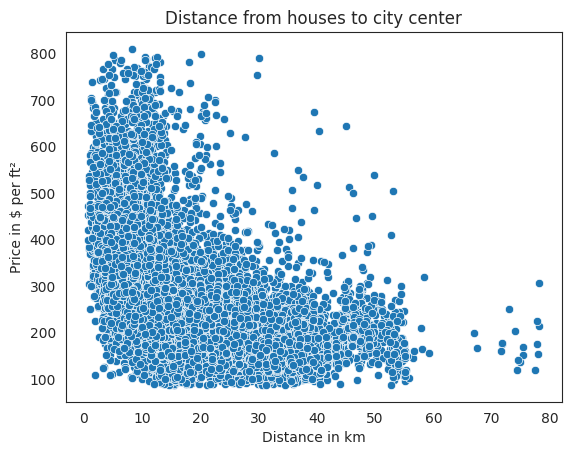

In [107]:
ax = sns.scatterplot(x=df["distance"], y=df["price_per_sqft_living"])
ax.set(
    xlabel="Distance in km",
    ylabel="Price in $ per ft²",
    title="Distance from houses to city center"
)
plt.show()

### Houses closer to the city center have less lot space

We utilize a geographical plot again, but this time it is being applied on the lot space feature.

In [108]:
def map_lot_space_to_color(the_value):
    if the_value < q25:
        return "red"
    if the_value < q75:
        return "orange"
    return "green"

# Get the q25 and q75 quantiles
q25 = df["sqft_lot"].quantile(0.25)
q75 = df["sqft_lot"].quantile(0.75)

# Aggregate data over zipcodes
map_df = df.groupby("zipcode").agg(
    lat=("lat", "mean"), 
    long=("long", "mean"), 
    sqft_lot=("sqft_lot", "mean")
)

# Create the map
m = folium.Map(
    location = [df["lat"].mean(), df["long"].mean()],
    zoom_start = 10,
    scrollWheelZoom = False
)

# Wrap the map with a figure
f = folium.Figure(width=MAP_WIDTH, height=MAP_HEIGHT).add_child(m)

# Mark seattle space needle as city center
folium.Marker(
    location=SPACE_NEEDLE_COORDS, 
    icon=folium.Icon(prefix="fa", icon="house", color="black"),
    tooltip="Seattle Space Needle"
).add_to(m)

# Create a marker for every zipcode
for index, row in map_df.iterrows():
    folium.Marker(
        location=[row["lat"], row["long"]], 
        icon=folium.Icon(prefix="fa", icon="house", color=map_lot_space_to_color(row["sqft_lot"])),
        tooltip="Lot space: <b>" + str(round(row["sqft_lot"])) + "</b> ft²"
    ).add_to(m)

# Plot the map
f

The map shows us that houses close to downtown Seattle have the lowest lot space on average. The more distance to the center, the greater the lot space.

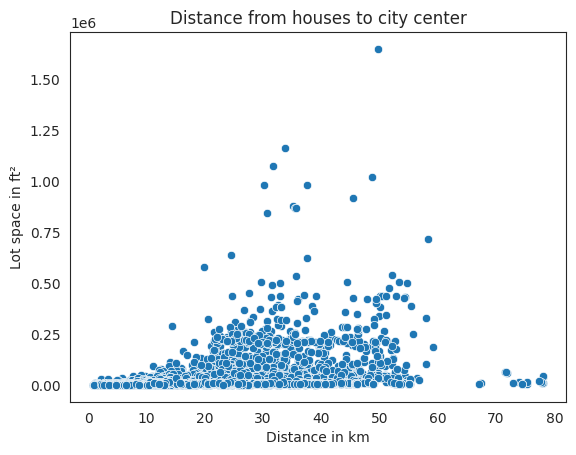

In [109]:
ax = sns.scatterplot(x=df["distance"], y=df["sqft_lot"])
ax.set(
    xlabel="Distance in km",
    ylabel="Lot space in ft²",
    title="Distance from houses to city center"
)
plt.show()

## Suggestions

As stated in the considerations section: Larry needs a house on the waterfront with at least three bedrooms. Unfortunately it also has to fit into his budget of 800000 $ and he won't visit houses with a grade lower than seven.

In [110]:
MAX_BUDGET = 800000
MIN_GRADE = 7

df_larry = df[(df["bedrooms"] >= 3) & (df["waterfront"] == 1) & (df["price"] <= MAX_BUDGET) & (df["grade"] >= MIN_GRADE)]
df_larry

,age,bathrooms,bedrooms,condition,distance,floors,grade,house_id,lat,long,price,price_per_sqft_living,price_per_sqft_lot,sold_date,sold_month,sold_weekday,sold_year,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
457,34,3.00,3.0,4,27.075982,2.0,9,2122039094,47.3844,-122.438,705000.0,357.868020,33.606636,2014-11-26,11,2,2014,1770.0,200.0,1970.0,2280.0,20978.0,75396.0,3.0,1.0,1980,0,98070
1155,53,1.75,4.0,3,14.805484,1.0,7,8069000075,47.5105,-122.238,790000.0,321.138211,78.521022,2014-12-29,12,0,2014,1410.0,1050.0,2460.0,2300.0,10061.0,10061.0,4.0,1.0,1961,0,98178
8270,96,2.50,3.0,3,34.107657,2.0,7,221029019,47.3338,-122.511,400000.0,191.387560,12.225686,2015-04-28,4,1,2015,1550.0,540.0,2090.0,1200.0,32718.0,192268.0,4.0,1.0,1919,<NA>,98070
9076,50,1.75,3.0,3,29.530636,1.0,8,3222049055,47.3554,-122.324,650000.0,232.142857,33.529351,2015-01-16,1,4,2015,1400.0,1400.0,2800.0,3270.0,19386.0,31450.0,4.0,1.0,1965,0,98198
9845,45,1.75,3.0,4,32.228809,2.0,8,121039083,47.3311,-122.375,629000.0,430.821918,50.861163,2015-02-06,2,4,2015,1120.0,340.0,1460.0,1970.0,12367.0,18893.0,4.0,1.0,1970,0,98023
11155,61,1.75,5.0,4,16.208087,1.0,8,7567600030,47.5022,-122.223,750000.0,284.090909,56.433409,2015-01-27,1,1,2015,1400.0,1240.0,2640.0,2400.0,13290.0,11942.0,4.0,1.0,1954,0,98178
11544,59,2.00,3.0,3,26.674226,1.0,7,2013802030,47.3811,-122.325,357000.0,145.121951,6.625589,2014-09-11,9,3,2014,2460.0,0.0,2460.0,2660.0,53882.0,32625.0,4.0,1.0,1955,0,98198
11832,85,3.50,3.0,4,18.657266,2.0,9,2623039082,47.4536,-122.376,770000.0,375.609756,35.412068,2015-02-18,2,2,2015,1750.0,300.0,2050.0,2300.0,21744.0,12200.0,4.0,1.0,1930,0,98166
13564,59,1.75,3.0,4,21.375894,1.0,7,2623029003,47.4590,-122.504,635000.0,327.319588,3.799551,2014-12-16,12,1,2014,1480.0,460.0,1940.0,1910.0,167125.0,127195.0,1.0,1.0,1955,0,98070
15316,91,0.75,4.0,4,28.482724,1.0,7,9536600010,47.3648,-122.325,520000.0,265.306122,62.824695,2014-12-23,12,1,2014,1320.0,640.0,1960.0,1940.0,8277.0,8402.0,4.0,1.0,1923,1986,98198


The filtered dataset only contains **15** results. Lets visualize them:

In [111]:
# Create the map
m = folium.Map(
    location = [df_larry["lat"].mean(), df_larry["long"].mean()],
    zoom_start = 10,
    scrollWheelZoom = False
)

# Wrap the map with a figure
f = folium.Figure(width=MAP_WIDTH, height=MAP_HEIGHT).add_child(m)

# Mark seattle space needle as city center
folium.Marker(
    location=SPACE_NEEDLE_COORDS, 
    icon=folium.Icon(prefix="fa", icon="house", color="black"),
    tooltip="Seattle Space Needle"
).add_to(m)

# Create a marker for every house in Larry's filtered dataset
for index, row in df_larry.iterrows():
    folium.Marker(
        location=[row["lat"], row["long"]], 
        icon=folium.Icon(prefix="fa", icon="house", color="green"), 
        tooltip=f"ID: {row['house_id']}<br/>" +
                f"Price: <b>{round(row['price'])} $</b><br/>" +
                f"Size of the house: <b>{round(row['sqft_living'])} ft²</b><br/>" + 
                f"Size of the lot: <b>{round(row['sqft_lot'])} ft²</b>"
    ).add_to(m)

# Plot the map
f

So what are Larry's other criteria. Ne want's a nice and isolated, but also central neighborhood. The most central houses in the result are the houses `7567600030, 8069000075, 8073000491, 2623039018, 2623039082, 7631800110, 6329000190, 6329000185`. Sorting them by the lot space (so he won't be disturbed by other people or families) leads to the narrowed set of five house candidates:


In [112]:
narrow_houses = [
    7567600030, 8069000075, 8073000491, 2623039018, 2623039082, 7631800110, 6329000190, 6329000185
]
df_larry = df_larry[df_larry["house_id"].isin(narrow_houses)].sort_values(by = "sqft_lot", ascending=False).head(5)
df_larry[[ 
    "house_id", 
    "price", 
    "distance",
    "yr_built",
    "grade", 
    "floors", 
    "bedrooms", 
    "bathrooms",
    "sqft_living", 
    "sqft_lot", 
    "sqft_living15", 
    "sqft_lot15"
]]

,house_id,price,distance,yr_built,grade,floors,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_living15,sqft_lot15
17460,6329000185,540000.0,13.606696,1912,8,1.5,3.0,2.50,2600.0,23361.0,1700.0,14700.0
16404,6329000190,750000.0,13.605612,1960,8,1.0,4.0,1.75,2520.0,21834.0,1700.0,8100.0
11832,2623039082,770000.0,18.657266,1930,9,2.0,3.0,3.50,2050.0,21744.0,2300.0,12200.0
18833,7631800110,380000.0,18.468440,1984,10,2.0,3.0,2.50,1980.0,17342.0,2060.0,17313.0
11155,7567600030,750000.0,16.208087,1954,8,1.0,5.0,1.75,2640.0,13290.0,2400.0,11942.0


The houses `6329000185, 6329000190, 2623039082` have a large lot. Their living and lot space also is greater than those of the 15 closest neighbors on average. House `7631800110` has a high grade rating of 10 and therefore it will also considered. House `7567600030` has a lot of bedrooms.

In [113]:
# Create the map
m = folium.Map(
    location = [df_larry["lat"].mean(), df_larry["long"].mean()],
    zoom_start = 12,
    scrollWheelZoom = False
)

# Wrap the map with a figure
f = folium.Figure(width=MAP_WIDTH, height=MAP_HEIGHT).add_child(m)

# Mark seattle space needle as city center
folium.Marker(
    location=SPACE_NEEDLE_COORDS, 
    icon=folium.Icon(prefix="fa", icon="house", color="black"),
    tooltip="Seattle Space Needle"
).add_to(m)

# Create a marker for every house in Larry's filtered dataset
for index, row in df_larry.iterrows():
    folium.Marker(
        location=[row["lat"], row["long"]], 
        icon=folium.Icon(prefix="fa", icon="house", color="green"), 
        tooltip=f"ID: {row['house_id']}<br/>" +
                f"Price: <b>{round(row['price'])} $</b><br/>" +
                f"Size of the house: <b>{round(row['sqft_living'])} ft²</b><br/>" + 
                f"Size of the lot: <b>{round(row['sqft_lot'])} ft²</b>"
    ).add_to(m)

# Plot the map
f

In [115]:
"""
DEBUG STUFF. JUST IGNORE..

#iqr = df["sqft_lot"].quantile(0.75) - df["sqft_lot"].quantile(0.25)
#df_large_lot = df[df["sqft_lot"] > df["sqft_lot"].median()+(1.5*iqr)]
#df_large_lot.sort_values(by="price_per_sqft_lot", ascending=False).head(20)
#print(df)

#sns.boxplot(x=df["grade"], y=df["price"])
#sns.boxplot(x=df["grade"], y=df["price_per_sqft_living"])
#sns.boxplot(x=df["grade"], y=df["price_per_sqft_lot"])


# Lot size + distance to the center
# age of the house + price_per_sqft_lot

with open("data/wa_washington_zip_codes_geo.min.json") as zip_json:
    #print(json.load(zip_json))
    folium.Choropleth(
        geo_data=json.load(zip_json),
        name="choropleth",
        data=map_df,
        columns=["zipcode", "price", "space", "count"],
        key_on="feature.properties.ZCTA5CE10",
        fill_color="YlGn",
        fill_opacity=0.8,
        line_opacity=0.4,
        nan_fill_color="white",
        bins=5
    ).add_to(m)

folium.LayerControl().add_to(m)
"""
"""
dfx = df[(df["distance"] > 8) & (df["distance"] < 10)]

# Create the map
m = folium.Map(
    location = [dfx["lat"].mean(), dfx["long"].mean()],
    zoom_start = 12,
    scrollWheelZoom = False
)

# Wrap the map with a figure
f = folium.Figure(width=MAP_WIDTH, height=MAP_HEIGHT).add_child(m)

# Mark seattle space needle as city center
folium.Marker(
    location=SPACE_NEEDLE_COORDS, 
    icon=folium.Icon(prefix="fa", icon="house", color="black"),
    tooltip="Seattle Space Needle"
).add_to(m)

# Create a marker for every house in Larry's filtered dataset
for index, row in dfx.iterrows():
    folium.Marker(
        location=[row["lat"], row["long"]], 
        icon=folium.Icon(prefix="fa", icon="house", color="green"), 
        tooltip=f"ID: {row['house_id']}<br/>" +
                f"Price: <b>{round(row['price'])} $</b><br/>" +
                f"Size of the house: <b>{round(row['sqft_living'])} ft²</b><br/>" + 
                f"Size of the lot: <b>{round(row['sqft_lot'])} ft²</b>"
    ).add_to(m)

# Plot the map
f
"""

'\ndfx = df[(df["distance"] > 8) & (df["distance"] < 10)]\n\n# Create the map\nm = folium.Map(\n    location = [dfx["lat"].mean(), dfx["long"].mean()],\n    zoom_start = 12,\n    scrollWheelZoom = False\n)\n\n# Wrap the map with a figure\nf = folium.Figure(width=MAP_WIDTH, height=MAP_HEIGHT).add_child(m)\n\n# Mark seattle space needle as city center\nfolium.Marker(\n    location=SPACE_NEEDLE_COORDS, \n    icon=folium.Icon(prefix="fa", icon="house", color="black"),\n    tooltip="Seattle Space Needle"\n).add_to(m)\n\n# Create a marker for every house in Larry\'s filtered dataset\nfor index, row in dfx.iterrows():\n    folium.Marker(\n        location=[row["lat"], row["long"]], \n        icon=folium.Icon(prefix="fa", icon="house", color="green"), \n        tooltip=f"ID: {row[\'house_id\']}<br/>" +\n                f"Price: <b>{round(row[\'price\'])} $</b><br/>" +\n                f"Size of the house: <b>{round(row[\'sqft_living\'])} ft²</b><br/>" + \n                f"Size of the lot: <b>